Plots: MaskScatter
==================

This example illustrates how to customize the mask of plotted data.

Although a mask is a 2D array of values, it is actually plotted as a `Grid2D` of (y,x) coordinates corresponding to the
centre of every pixel at the edge of the mask. The mask is therefore plotted using the `GridScatter` object described
in `autolens_workspace.plot.mat_wramat_plot.Mat_structure`.

The `MaskScatter` object serves the purpose is allowing us to uniquely customize the appearance of any mask on a plot.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load an example Hubble Space Telescope image of a real strong lens as an `Array2D`.

In [2]:
dataset_path = path.join("dataset", "slacs", "slacs1430+4105")
image_path = path.join(dataset_path, "image.fits")
image = al.Array2D.from_fits(file_path=image_path, hdu=0, pixel_scales=0.03)

We will also need the mask we will plot on the figure, which we associate with the image.

In [3]:
mask = al.Mask2D.circular_annular(
    shape_native=image.shape_native,
    pixel_scales=image.pixel_scales,
    inner_radius=0.3,
    outer_radius=3.0,
    sub_size=image.sub_size,
)
masked_image = al.Array2D.manual_mask(array=image.native, mask=mask)

The `Array2D` includes its mask as an internal property, meaning we can plot it via an `Include2D` object.

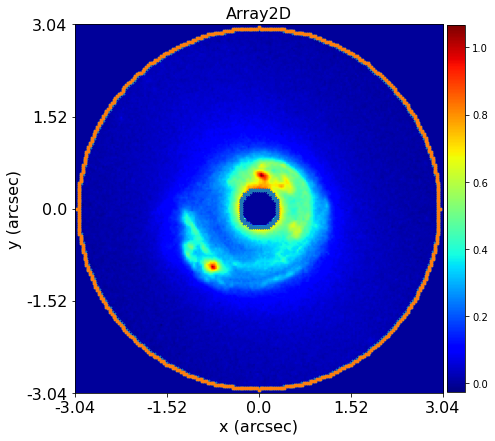

In [4]:
include_2d = aplt.Include2D(mask=True)
array_plotter = aplt.Array2DPlotter(array=masked_image, include_2d=include_2d)
array_plotter.figure()

The appearance of the mask is customized using a `Scatter` object.

To plot the mask this object wraps the following matplotlib method:

 https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html

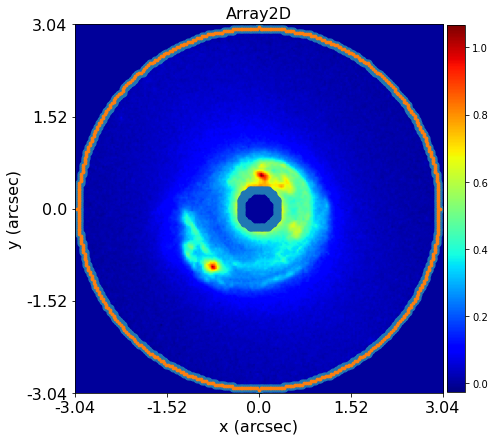

In [5]:
mask_scatter = aplt.MaskScatter(marker="o", c="r", s=50)

mat_plot_2d = aplt.MatPlot2D(mask_scatter=mask_scatter)

array_plotter = aplt.Array2DPlotter(
    array=masked_image, mat_plot_2d=mat_plot_2d, include_2d=include_2d
)
array_plotter.figure()


To plot the mask manually, we can pass it into a` Visuals2D` object. 

This means we don't need to create the `masked_image` array we used above.

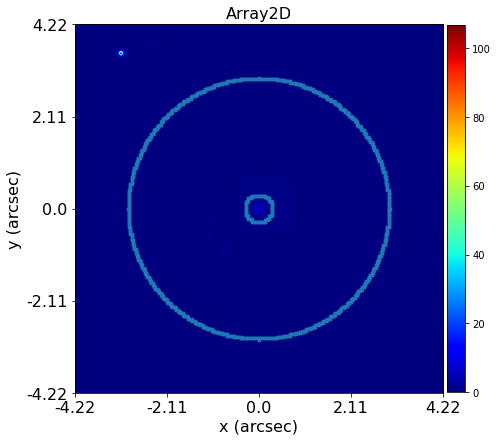

In [6]:
visuals_2d = aplt.Visuals2D(mask=mask)

array_plotter = aplt.Array2DPlotter(array=image, visuals_2d=visuals_2d)
array_plotter.figure()

Finish.